# Tower Jumps Dataset

## Install libraries and import

In [5]:
%pip install matplotlib pandas
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Load dataset and preprocessing data

In [6]:
file_path = '../data/TowerJumpsDataSet_CarrierRecords.csv'
data = pd.read_csv(file_path)
data['Local Date & Time'] = pd.to_datetime(data['Local Date & Time'], format='%m/%d/%y %H:%M', errors='coerce')
data.sort_values('Local Date & Time', inplace=True)

##  Exploratory Data Analysis

### Display basic information

In [7]:
display(data.info())
display(data.head(30))

<class 'pandas.core.frame.DataFrame'>
Index: 129095 entries, 7527 to 121341
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Page Number        129095 non-null  int64         
 1   Item Number        129095 non-null  int64         
 2   Local Date & Time  129095 non-null  datetime64[ns]
 3   Latitude           129095 non-null  float64       
 4   Longitude          129095 non-null  float64       
 5   Time Zone          129095 non-null  object        
 6   County             129095 non-null  object        
 7   State              129095 non-null  object        
 8   Country            80059 non-null   object        
 9   Record Type        128908 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 10.8+ MB


None

,Page Number,Item Number,Local Date & Time,Latitude,Longitude,Time Zone,County,State,Country,Record Type
7527,479,1,2021-01-01 13:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
7528,479,2,2021-01-01 13:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
7530,479,4,2021-01-01 14:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
7529,479,3,2021-01-01 14:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
121343,9288,1,2021-01-01 15:04:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,SMS
7532,479,6,2021-01-01 15:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
7531,479,5,2021-01-01 15:40:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data
7533,479,7,2021-01-01 15:54:00,40.885160,-72.380530,America/New_York,Suffolk,New York,NaN,Data
7534,479,8,2021-01-01 15:55:00,40.921000,-72.394860,America/New_York,Suffolk,New York,United States,Data
7535,479,9,2021-01-01 15:56:00,40.888370,-72.444778,America/New_York,Suffolk,New York,United States,Data


### Plot frequency of state occurrences

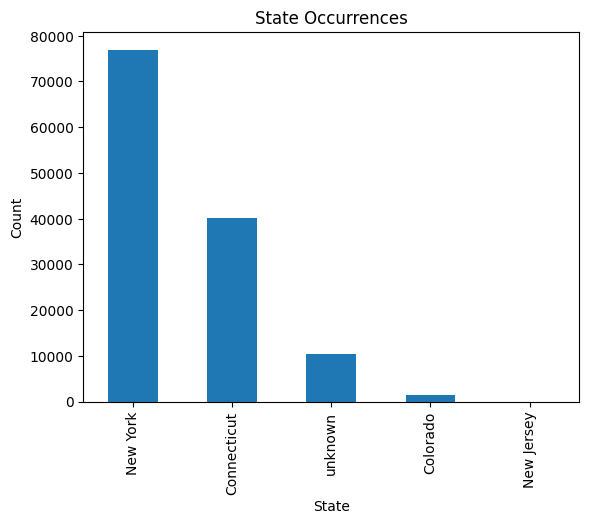

In [8]:
data['State'].value_counts().plot(kind='bar', title='State Occurrences')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Plot timeline of recorded states


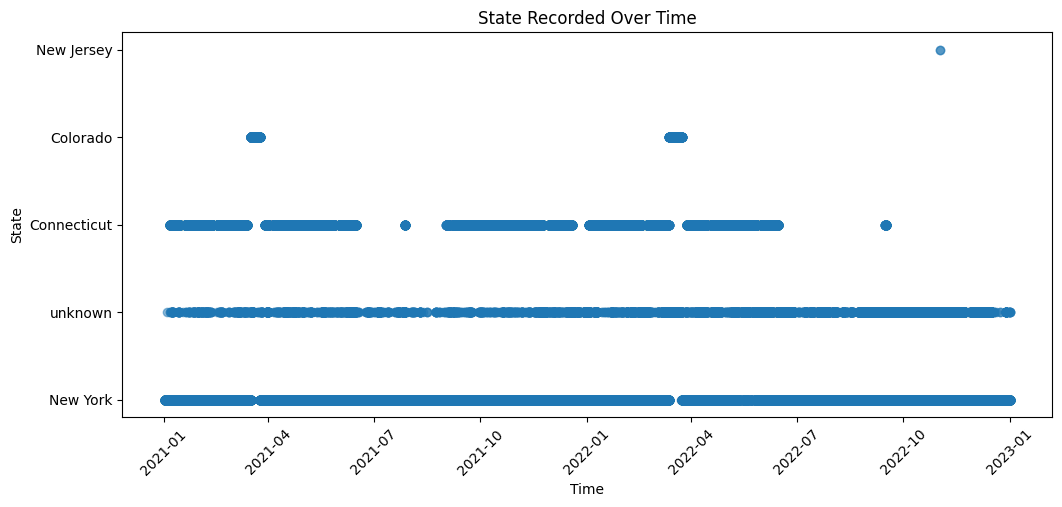

In [9]:
plt.figure(figsize=(12, 5))
plt.scatter(data['Local Date & Time'], data['State'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('State')
plt.title('State Recorded Over Time')
plt.xticks(rotation=45)
plt.show()

## Calculate location confidence

In [10]:
def calculate_confidence_for_interval(data, start_time, end_time, sub_interval="1H"):
    filtered_data = data[
        (data["Local Date & Time"] >= start_time)
        & (data["Local Date & Time"] <= end_time)
    ].copy()
    if filtered_data.empty:
        return pd.DataFrame(
            columns=["Start Time", "End Time", "Dominant State", "Confidence (%)"]
        )

    filtered_data.set_index("Local Date & Time", inplace=True)
    resampled = filtered_data.resample(sub_interval).apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"
    )
    confidence = filtered_data.resample(sub_interval)["State"].apply(
        lambda x: 100 * (x.value_counts().max() / len(x)) if len(x) > 0 else 0
    )

    # Update: Handle no clear mode by defaulting to "Unknown"
    dominant_state_mode = resampled["State"].mode()
    dominant_state = (
        dominant_state_mode.iloc[0] if len(dominant_state_mode) == 1 else "Unknown"
    )
    overall_confidence = (
        filtered_data["State"].value_counts().max() / len(filtered_data)
    ) * 100

    result = pd.DataFrame(
        {
            "Start Time": [start_time],
            "End Time": [end_time],
            "Dominant State": [dominant_state],
            "Confidence (%)": [overall_confidence],
        }
    )

    return result

In [11]:
start = pd.Timestamp('2021-01-05 21:00:00')
end = pd.Timestamp('2021-01-05 23:00:00')
dynamic_interval_confidence = calculate_confidence_for_interval(data, start, end)
display(dynamic_interval_confidence)

/var/folders/pn/2rzg6kcs4ks2twnpf9mqn4600000gn/T/ipykernel_75715/1608742493.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = filtered_data.resample(sub_interval).apply(
/var/folders/pn/2rzg6kcs4ks2twnpf9mqn4600000gn/T/ipykernel_75715/1608742493.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  confidence = filtered_data.resample(sub_interval)["State"].apply(


,Start Time,End Time,Dominant State,Confidence (%)
0,2021-01-05 21:00:00,2021-01-05 23:00:00,Connecticut,65.714286
